# Problem-statement

## In this notebook, we will be building a portfolio using Markowitz's modern portfolio theory, analyse S&P500 stock prices and forecasting stocks

- We will try to determine new trends that can help investors make more informed decisions.
- select stocks to invest in for the portfolio


In [70]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
from scipy import stats
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


In [68]:
pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 260.8 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 760.0 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.2/936.2 kB 1.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.1/805.1 kB 667.9 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 457.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 724.5 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.6/252.6 kB 346.9 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 712.0 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 1.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 63.4.1
    Uninstalling setuptools-63.4.1:
      Successfully uninstalled setuptools-63.4.1
  Attempting un

### importing datasets

In [10]:
df_stocks = pd.read_csv('/Users/mac/Downloads/all_stocks_5yr.csv')

In [21]:
df_comp = pd.read_csv('/Users/mac/Downloads/List of SP 500 companies.csv.xls')

In [24]:
df_comp.head()

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ABMD,ABIOMED Inc,Health Care


In [11]:
df_stocks.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


- we will be focusing on the Technology sector companies 

# Markowitz's modern portfolio theory
### Markowitz created a formula that allows an investor to mathematically trade off risk tolerance and reward expectations, resulting in the ideal portfolio.
- This theory was based on two main concepts:
- 1. Every investor’s goal is to maximize return for any level of risk
- 2. Risk can be reduced by diversifying a portfolio through individual, unrelated securities


## The goal is to create an optimized portfolio of technology stocks from the S&P 500, aiming to maximize returns for a given level of risk.

# Data Preprocessing:

In [25]:
df_comp['Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Discretionary', 'Utilities',
       'Financials', 'Materials', 'Real Estate', 'Consumer Staples',
       'Energy'], dtype=object)

# we only need the information technology sector

In [29]:
df_tech=df.loc[df['Sector'] == 'Information Technology']
df_tech.head()

,Symbol,Name,Sector
5,ACN,Accenture plc,Information Technology
7,ADBE,Adobe Inc.,Information Technology
9,AMD,Advanced Micro Devices Inc,Information Technology
14,AKAM,Akamai Technologies Inc,Information Technology
39,APH,Amphenol Corp,Information Technology


In [34]:
df_tech.reset_index(inplace = True, drop = True)
df_tech.head()

,Symbol,Name,Sector
0,ACN,Accenture plc,Information Technology
1,ADBE,Adobe Inc.,Information Technology
2,AMD,Advanced Micro Devices Inc,Information Technology
3,AKAM,Akamai Technologies Inc,Information Technology
4,APH,Amphenol Corp,Information Technology


In [36]:
def information_func(df):
    print("unique stocks available in dataset", df['Name'].nunique())
    print('-----'*10)
    print('dataset info')
    df.info()
    print('-----'*10)
    null = df.isnull().sum()
    print("missing values:\n", null)

In [37]:
information_func(df_tech)

unique stocks available in dataset 71
--------------------------------------------------
dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Symbol  71 non-null     object
 1   Name    71 non-null     object
 2   Sector  71 non-null     object
dtypes: object(3)
memory usage: 1.8+ KB
--------------------------------------------------
missing values:
 Symbol    0
Name      0
Sector    0
dtype: int64


In [38]:
information_func(df_stocks)

unique stocks available in dataset 505
--------------------------------------------------
dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB
--------------------------------------------------
missing values:
 date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64


In [39]:
# change name to ticks
rdf = df_stocks.rename(columns={'Name':'ticks'})

# drop the null as they a few values and time-series won't be affected by such values
rdf.dropna(inplace=True)

# change the dtype of date column
new_df = rdf.copy()
new_df.loc[:, 'date'] = pd.to_datetime(rdf.loc[:, 'date'], format='%Y/%m/%d')

# new dataframe info
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619029 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619029 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619029 non-null  float64       
 3   low     619029 non-null  float64       
 4   close   619029 non-null  float64       
 5   volume  619029 non-null  int64         
 6   ticks   619029 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 37.8+ MB


In [40]:
new_df.head()

,date,open,high,low,close,volume,ticks
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


## selecting Information technology company
- we are to build our portfolio based on Technology Stocks in the S&P 500 

In [43]:
new_df['ticks'].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [56]:
matches = new_df['ticks'].isin(df_tech.values.ravel())


In [57]:
matches

0         False
1         False
2         False
3         False
4         False
          ...  
619035    False
619036    False
619037    False
619038    False
619039    False
Name: ticks, Length: 619029, dtype: bool

In [62]:
df1 = new_df[matches]

In [63]:
df1.head()

,date,open,high,low,close,volume,ticks
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [64]:
df1['ticks'].unique()

array(['AAPL', 'ACN', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AKAM', 'AMAT', 'AMD',
       'ANSS', 'APH', 'AVGO', 'CDNS', 'CRM', 'CSCO', 'CTSH', 'CTXS',
       'DXC', 'FFIV', 'FISV', 'FIS', 'FLIR', 'GLW', 'GPN', 'HPE', 'HPQ',
       'IBM', 'INTC', 'INTU', 'IT', 'JNPR', 'KLAC', 'LRCX', 'MA', 'MCHP',
       'MSFT', 'MSI', 'MU', 'NTAP', 'NVDA', 'ORCL', 'PAYX', 'PYPL',
       'QCOM', 'QRVO', 'SNPS', 'STX', 'SWKS', 'TEL', 'TXN', 'VRSN', 'V',
       'WDC', 'WU', 'XLNX', 'XRX'], dtype=object)

# Data analysis on the stocks

In [65]:
# using a for loop to get the top 10 stock ticker by getting the mean volume
mean_dict = {}

for key in df1['ticks'].unique():
    value = df1[df1['ticks']== key]['volume'].mean()
    mean_dict[key]= value
    
print("Length of the mean of ticks dictionary:", len(mean_dict))

# convert dict to pandas dataframe
avaerage_s = pd.Series(mean_dict).transpose()
top10_s = avaerage_s.sort_values(ascending=False)[:10]

print("Top 10 company tickers with highest average traded stock volume:\n", top10_s)  

Length of the mean of ticks dictionary: 56
Top 10 company tickers with highest average traded stock volume:
 AAPL    5.404790e+07
MSFT    3.386946e+07
AMD     3.251904e+07
MU      3.024841e+07
INTC    2.932671e+07
CSCO    2.865435e+07
ORCL    1.600364e+07
AMAT    1.323003e+07
HPQ     1.257883e+07
HPE     1.166464e+07
dtype: float64


# Diversification of the portfolio 
- we are using 10 stocks 

In [84]:
assets = ['AAPL','MSFT','AMD','MU','INTC','CSCO','ORCL','AMAT','HPQ','HPE']

# daily Returns

In [74]:
df1.head()

,date,open,high,low,close,volume,ticks
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [95]:
df2 = df1[['date','close','ticks']]
df2.head()

,date,close,ticks
1259,2013-02-08,67.8542,AAPL
1260,2013-02-11,68.5614,AAPL
1261,2013-02-12,66.8428,AAPL
1262,2013-02-13,66.7156,AAPL
1263,2013-02-14,66.6556,AAPL


In [96]:
df3=df2.set_index('date')
df3.head()

,close,ticks
date,,
2013-02-08,67.8542,AAPL
2013-02-11,68.5614,AAPL
2013-02-12,66.8428,AAPL
2013-02-13,66.7156,AAPL
2013-02-14,66.6556,AAPL


In [110]:
# List of categories to filter
categories_to_filter = ['AAPL', 'MSFT', 'AMD', 'MU', 'INTC', 'CSCO', 'ORCL', 'AMAT', 'HPQ', 'HPE']

# Use .isin() to filter rows
filtered_df = df3[df3['ticks'].isin(categories_to_filter)]
filtered_df.head()

,close,ticks
date,,
2013-02-08,67.8542,AAPL
2013-02-11,68.5614,AAPL
2013-02-12,66.8428,AAPL
2013-02-13,66.7156,AAPL
2013-02-14,66.6556,AAPL


In [111]:
pivot_df = filtered_df.pivot(columns='ticks')
pivot_df.columns = [col[1] for col in pivot_df.columns]
pivot_df.head()

,AAPL,AMAT,AMD,CSCO,HPE,HPQ,INTC,MSFT,MU,ORCL
date,,,,,,,,,,
2013-02-08,67.8542,13.61,2.59,21.16,NaN,NaN,21.00,27.55,7.75,34.90
2013-02-11,68.5614,13.66,2.67,21.27,NaN,NaN,21.03,27.86,7.91,34.96
2013-02-12,66.8428,13.66,2.77,20.97,NaN,NaN,21.19,27.88,7.92,35.11
2013-02-13,66.7156,13.77,2.75,21.14,NaN,NaN,21.25,28.03,7.95,34.99
2013-02-14,66.6556,13.89,2.75,20.99,NaN,NaN,21.23,28.04,8.08,34.90


In [136]:
# we are dropping HPE and HPQ because of the missing Data

In [113]:
pivot_df.drop(['HPE','HPQ'],axis = 1, inplace = True)

In [116]:
pivot_df=pivot_df.dropna()


In [119]:
pivot_df.head()

,AAPL,AMAT,AMD,CSCO,INTC,MSFT,MU,ORCL
date,,,,,,,,
2013-02-08,67.8542,13.61,2.59,21.16,21.00,27.55,7.75,34.90
2013-02-11,68.5614,13.66,2.67,21.27,21.03,27.86,7.91,34.96
2013-02-12,66.8428,13.66,2.77,20.97,21.19,27.88,7.92,35.11
2013-02-13,66.7156,13.77,2.75,21.14,21.25,28.03,7.95,34.99
2013-02-14,66.6556,13.89,2.75,20.99,21.23,28.04,8.08,34.90


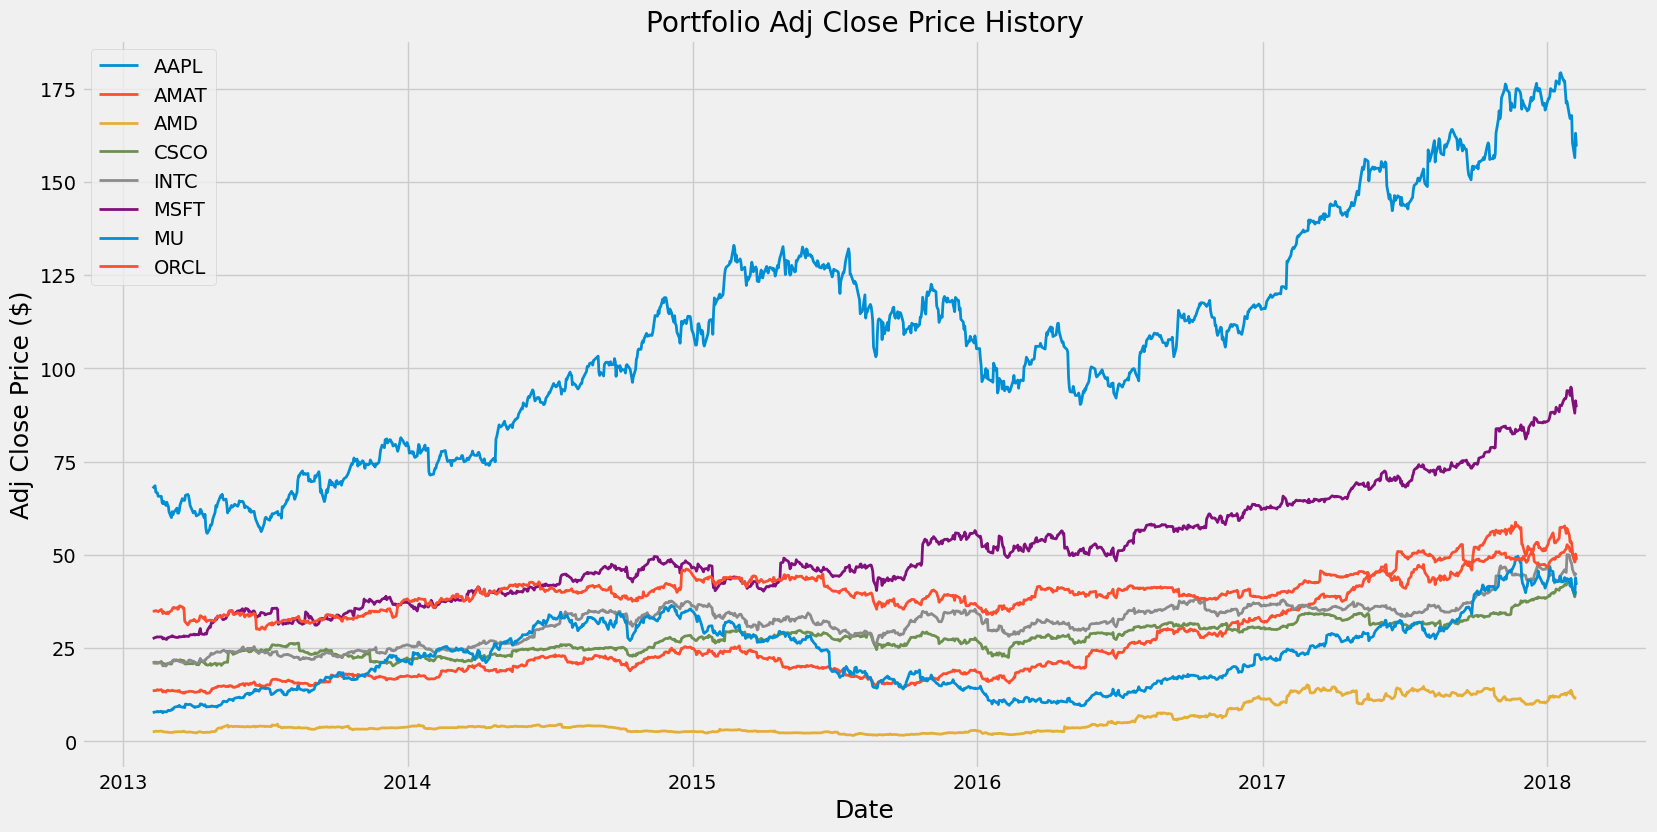

In [120]:
# Visualize the stocks
my_stocks=pivot_df

plt.figure(figsize=(18,9))
for i in my_stocks.columns.values:
    plt.plot(my_stocks[i], label=i, linewidth=2)

plt.title('Portfolio Adj Close Price History')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price ($)', fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show() 

In [121]:
stock_returns = pivot_df.pct_change()

In [124]:
stock_returns

,AAPL,AMAT,AMD,CSCO,INTC,MSFT,MU,ORCL
date,,,,,,,,
2013-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,0.010422,0.003674,0.030888,0.005198,0.001429,0.011252,0.020645,0.001719
2013-02-12,-0.025067,0.000000,0.037453,-0.014104,0.007608,0.000718,0.001264,0.004291
2013-02-13,-0.001903,0.008053,-0.007220,0.008107,0.002832,0.005380,0.003788,-0.003418
2013-02-14,-0.000899,0.008715,0.000000,-0.007096,-0.000941,0.000357,0.016352,-0.002572
...,...,...,...,...,...,...,...,...
2018-02-01,0.002090,-0.006526,-0.035662,0.003852,-0.010179,-0.007894,-0.028134,0.000775
2018-02-02,-0.043390,-0.048799,-0.060377,-0.018465,-0.031480,-0.026310,-0.039303,-0.029053
2018-02-05,-0.024984,-0.046764,-0.070683,-0.052529,-0.035320,-0.041185,-0.034787,-0.040694


In [128]:
# forecasts expected returns by taking the historical average returns from the stocks in the list
mu2 = expected_returns.mean_historical_return(pivot_df)
mu2

AAPL    0.187121
AMAT    0.291424
AMD     0.350972
CSCO    0.138210
INTC    0.166261
MSFT    0.266990
MU      0.403711
ORCL    0.069884
dtype: float64

In [126]:
# annualized covariance matrix
cov_matrix_annual=stock_returns.cov()*252
cov_matrix_annual
# diagonal numbers are variance, other numbers are covariance 

,AAPL,AMAT,AMD,CSCO,INTC,MSFT,MU,ORCL
AAPL,0.053757,0.024252,0.026072,0.016616,0.017023,0.019182,0.029478,0.015193
AMAT,0.024252,0.075458,0.052499,0.021883,0.027815,0.024512,0.060407,0.020585
AMD,0.026072,0.052499,0.360275,0.021736,0.035795,0.023945,0.085304,0.028073
CSCO,0.016616,0.021883,0.021736,0.044365,0.020530,0.019779,0.030253,0.020179
INTC,0.017023,0.027815,0.035795,0.020530,0.049081,0.024649,0.039407,0.017409
MSFT,0.019182,0.024512,0.023945,0.019779,0.024649,0.050884,0.030286,0.019722
MU,0.029478,0.060407,0.085304,0.030253,0.039407,0.030286,0.190114,0.028102
ORCL,0.015193,0.020585,0.028073,0.020179,0.017409,0.019722,0.028102,0.042663


## Portfolio weights that yield the maximum expected sharpe ratio

In [129]:
# calculates the portfolio weights that yield the maximum expected sharpe ratio
ef = EfficientFrontier(mu2, cov_matrix_annual)
ef.max_sharpe()
    

OrderedDict([('AAPL', 0.1085811514821214),
             ('AMAT', 0.2290359533875672),
             ('AMD', 0.0370643752476341),
             ('CSCO', 0.0),
             ('INTC', 0.0),
             ('MSFT', 0.5021260390593154),
             ('MU', 0.1231924808233619),
             ('ORCL', 0.0)])

- This shows how to diversify the allocation of the stocks to reduce risks

In [130]:
ef.portfolio_performance(verbose=True)

Expected annual return: 28.4%
Annual volatility: 20.1%
Sharpe Ratio: 1.31


(0.28386990835991804, 0.20113051070451826, 1.3119337659693535)

# Plotting the EfficientFrontier

Expected annual return: 28.4%
Annual volatility: 20.1%
Sharpe Ratio: 1.31


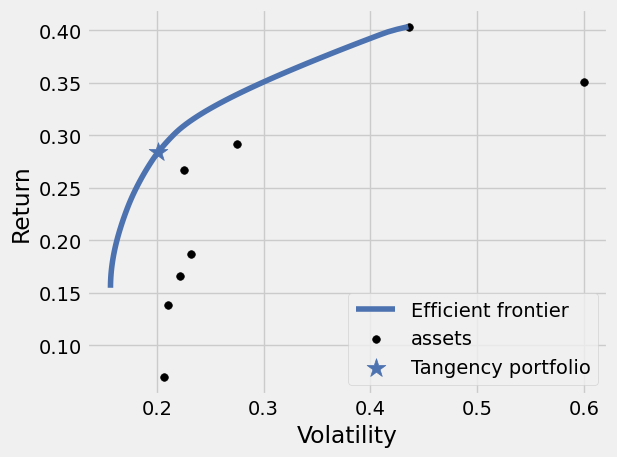

In [131]:
import cvxpy
from pypfopt import plotting
ef_plot = EfficientFrontier(mu2, cov_matrix_annual, weight_bounds=(0,1))
weights_plot = ef_plot.max_sharpe()
ef_plot.portfolio_performance(verbose=True)
# new EfficientFrontier instance for adding constraint 
ef_constraints = EfficientFrontier(mu2, cov_matrix_annual, weight_bounds=(0,1))
ef_constraints.add_constraint(lambda x: cvxpy.sum(x) == 1)
# plot of the EfficientFrontier and risky investment set
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef_constraints, ax = ax, show_assets= True)
ax.scatter(ef_plot.portfolio_performance()[1], ef_plot.portfolio_performance()[0], marker="*", s=200,label ="Tangency portfolio")
ax.legend()
plt.show()

- 50,000 Allocated to this portfolio 

- distributing $50,000 with the assets in the portfolio based on optimal weights

In [135]:
Portfolio_size = 50000

ef_allocation = EfficientFrontier(mu2,cov_matrix_annual)

weights = ef_allocation.max_sharpe()
allocation= {ticker: weight * Portfolio_size for ticker, weight in weights.items()}

for ticker, amount in allocation.items():
    print(f"Allocate ${amount:.2f} to {ticker}")
    

Allocate $5429.06 to AAPL
Allocate $11451.80 to AMAT
Allocate $1853.22 to AMD
Allocate $0.00 to CSCO
Allocate $0.00 to INTC
Allocate $25106.30 to MSFT
Allocate $6159.62 to MU
Allocate $0.00 to ORCL


# The amount to allocate to each stocks in the portfolio to get maximum return by using low-risk, low-return, and high-risk, high-return stocks based on markowitz model of portfolio theory 